In [1]:
import nbimporter
import numpy as np
from matplotlib import pyplot as plt
from OptiEngine import FEM_2D, Config, Timer, optimize

In [7]:
class Generator():
    def __init__(self, save_path):
        self.path = save_path
        self.load_tasks = []
        self.fix_tasks = []
    
    # Saves design_matrix (np.ndarray) to txt
    def save_design(self, design_name, design_matrix):
        full_name = f'{self.path}\\{design_name}_result.txt'
        np.savetxt(full_name, design_matrix)
    
    # Saves design image to JPG
    def save_design_img(self, design_name, design_matrix):
        full_name = f'{self.path}\\{design_name}_img.jpg'
        plt.imshow(design_matrix, cmap = 'PuBuGn', interpolation = 'gaussian', interpolation_stage = 'rgba')
        plt.savefig(full_name)
    
    # Saves design task as matrix
    def save_design_task(self, design_name, fix_task, load_task):
        full_name = f'{self.path}\\{design_name}_task.txt'
        matrix = np.zeros((30, 30))
        for fix in fix_task:
            x = fix[1]
            y = fix[0]
            matrix[y][x] = 1
        for load in load_task:
            x = load[1]
            y = load[0]
            matrix[y][x] = -1
        np.savetxt(full_name, matrix)
    
    def save_all(self, design_name, design_matrix, fix_task, load_task):
        self.save_design(design_name, design_matrix)
        self.save_design_img(design_name, design_matrix)
        self.save_design_task(design_name, fix_task, load_task)
        
    def get_config(self):
        config = Config()
        config.nx = 30
        config.ny = 30
        config.vol_frac = 0.3
        config.penalize = 3
        config.dense_delta = 0.02
        config.max_iter = 1
        config.E0 = 1
        config.E_void = 1e-9
        config.filter_r = 1.5
        config.move = 0.2
        config.fem_save_iters = []
        
        return config
                
    def collect_loads(self, load_tasks):
        for load in load_tasks:
            self.load_tasks.append(load)
            
    def collect_fixes(self, fix_tasks):
        for fix in fix_tasks:
            self.fix_tasks.append(fix)
            
    # With known fix and load tasks, generates designs with all kinds of their combinations
    def generate(self, name_template):
        config = self.get_config()
        sample_index = 0
        
        print(f'Generating {len(self.load_tasks)*len(self.fix_tasks)} designs')
        try:
            for curr_fix in self.fix_tasks:
                for curr_load in self.load_tasks:
                    solver = FEM_2D(config.nx, config.ny, config.filter_r)
                    for node in curr_fix:
                        solver.fix_node(node[0], node[1], node[2], node[3])
                    for node in curr_load:
                        solver.apply_load(node[0], node[1], node[2], node[3])
                    solver.form_elements()
                    config.H, config.sH = solver.prepare_filter()
                    xphys = optimize(solver, config, False, False)
                    ey = config.ny - 1
                    ex = config.nx - 1
                    design_matrix = np.zeros((ey, ex))
                    for col in range(ex):
                        for row in range(ey):
                            design_matrix[row][col] = xphys[col*ey + row]
                    design_name = f'{name_template}_{sample_index}'
                    self.save_all(design_name, design_matrix, curr_fix, curr_load)
                    print(f'Sample {sample_index} done.')
                    sample_index += 1
        except:
            print(f'Warning! Error occured. Current setup:')
            print(curr_load)
            print(curr_fix)
            solver.draw_marked()

In [8]:
# Sample  fix and loads setup
# Fix Type 1
fix_type_1 = [
    [
        [0, 29, 1, 1],
        [29, 29, 1, 1]
    ]
]

# Fix Type 2
fix_type_2 = []
for fix_1 in range(1, 29, 4):
    for fix_2 in range(1, 29, 4):
        if (fix_1 != fix_2):
            fix_type_2.append([
                [fix_1, 29, 1, 1],
                [fix_2, 29, 1, 1]
            ])

# Fix Type 3
fix_type_3 = [[ [fix, 29, 1, 1] for fix in range(0,30) ]]

# Load type 1
load_type_1 = []

for row in range(0, 30, 3):
    for col in range(0, 21, 4):
        load_type_1.append([
            [row, col, 0, -1]
        ])

In [9]:
gen = Generator('..\\Train_Data\\Square_Bucket_1')

In [10]:
gen.collect_fixes(fix_type_1)
gen.collect_fixes(fix_type_2)
gen.collect_fixes(fix_type_3)

In [11]:
gen.collect_loads(load_type_1)

Generating 2640 designs
Sample 0 done.
Sample 1 done.
Sample 2 done.
Sample 3 done.
Sample 4 done.
Sample 5 done.
Sample 6 done.
Sample 7 done.
Sample 8 done.
Sample 9 done.
Sample 10 done.
Sample 11 done.
Sample 12 done.
Sample 13 done.
Sample 14 done.
Sample 15 done.
Sample 16 done.
Sample 17 done.
Sample 18 done.
Sample 19 done.
Sample 20 done.
Sample 21 done.
Sample 22 done.
Sample 23 done.
Sample 24 done.
Sample 25 done.
Sample 26 done.
Sample 27 done.
Sample 28 done.
Sample 29 done.
Sample 30 done.
Sample 31 done.
Sample 32 done.
Sample 33 done.
Sample 34 done.
Sample 35 done.
Sample 36 done.
Sample 37 done.
Sample 38 done.
Sample 39 done.
Sample 40 done.
Sample 41 done.
Sample 42 done.
Sample 43 done.
Sample 44 done.
Sample 45 done.
Sample 46 done.
Sample 47 done.
Sample 48 done.
Sample 49 done.
Sample 50 done.
Sample 51 done.
Sample 52 done.
Sample 53 done.
Sample 54 done.
Sample 55 done.
Sample 56 done.
Sample 57 done.
Sample 58 done.
Sample 59 done.
Sample 60 done.
Sample 61 

Sample 487 done.
Sample 488 done.
Sample 489 done.
Sample 490 done.
Sample 491 done.
Sample 492 done.
Sample 493 done.
Sample 494 done.
Sample 495 done.
Sample 496 done.
Sample 497 done.
Sample 498 done.
Sample 499 done.
Sample 500 done.
Sample 501 done.
Sample 502 done.
Sample 503 done.
Sample 504 done.
Sample 505 done.
Sample 506 done.
Sample 507 done.
Sample 508 done.
Sample 509 done.
Sample 510 done.
Sample 511 done.
Sample 512 done.
Sample 513 done.
Sample 514 done.
Sample 515 done.
Sample 516 done.
Sample 517 done.
Sample 518 done.
Sample 519 done.
Sample 520 done.
Sample 521 done.
Sample 522 done.
Sample 523 done.
Sample 524 done.
Sample 525 done.
Sample 526 done.
Sample 527 done.
Sample 528 done.
Sample 529 done.
Sample 530 done.
Sample 531 done.
Sample 532 done.
Sample 533 done.
Sample 534 done.
Sample 535 done.
Sample 536 done.
Sample 537 done.
Sample 538 done.
Sample 539 done.
Sample 540 done.
Sample 541 done.
Sample 542 done.
Sample 543 done.
Sample 544 done.
Sample 545 don

Sample 969 done.
Sample 970 done.
Sample 971 done.
Sample 972 done.
Sample 973 done.
Sample 974 done.
Sample 975 done.
Sample 976 done.
Sample 977 done.
Sample 978 done.
Sample 979 done.
Sample 980 done.
Sample 981 done.
Sample 982 done.
Sample 983 done.
Sample 984 done.
Sample 985 done.
Sample 986 done.
Sample 987 done.
Sample 988 done.
Sample 989 done.
Sample 990 done.
Sample 991 done.
Sample 992 done.
Sample 993 done.
Sample 994 done.
Sample 995 done.
Sample 996 done.
Sample 997 done.
Sample 998 done.
Sample 999 done.
Sample 1000 done.
Sample 1001 done.
Sample 1002 done.
Sample 1003 done.
Sample 1004 done.
Sample 1005 done.
Sample 1006 done.
Sample 1007 done.
Sample 1008 done.
Sample 1009 done.
Sample 1010 done.
Sample 1011 done.
Sample 1012 done.
Sample 1013 done.
Sample 1014 done.
Sample 1015 done.
Sample 1016 done.
Sample 1017 done.
Sample 1018 done.
Sample 1019 done.
Sample 1020 done.
Sample 1021 done.
Sample 1022 done.
Sample 1023 done.
Sample 1024 done.
Sample 1025 done.
Sampl

Sample 1426 done.
Sample 1427 done.
Sample 1428 done.
Sample 1429 done.
Sample 1430 done.
Sample 1431 done.
Sample 1432 done.
Sample 1433 done.
Sample 1434 done.
Sample 1435 done.
Sample 1436 done.
Sample 1437 done.
Sample 1438 done.
Sample 1439 done.
Sample 1440 done.
Sample 1441 done.
Sample 1442 done.
Sample 1443 done.
Sample 1444 done.
Sample 1445 done.
Sample 1446 done.
Sample 1447 done.
Sample 1448 done.
Sample 1449 done.
Sample 1450 done.
Sample 1451 done.
Sample 1452 done.
Sample 1453 done.
Sample 1454 done.
Sample 1455 done.
Sample 1456 done.
Sample 1457 done.
Sample 1458 done.
Sample 1459 done.
Sample 1460 done.
Sample 1461 done.
Sample 1462 done.
Sample 1463 done.
Sample 1464 done.
Sample 1465 done.
Sample 1466 done.
Sample 1467 done.
Sample 1468 done.
Sample 1469 done.
Sample 1470 done.
Sample 1471 done.
Sample 1472 done.
Sample 1473 done.
Sample 1474 done.
Sample 1475 done.
Sample 1476 done.
Sample 1477 done.
Sample 1478 done.
Sample 1479 done.
Sample 1480 done.
Sample 148

Sample 1882 done.
Sample 1883 done.
Sample 1884 done.
Sample 1885 done.
Sample 1886 done.
Sample 1887 done.
Sample 1888 done.
Sample 1889 done.
Sample 1890 done.
Sample 1891 done.
Sample 1892 done.
Sample 1893 done.
Sample 1894 done.
Sample 1895 done.
Sample 1896 done.
Sample 1897 done.
Sample 1898 done.
Sample 1899 done.
Sample 1900 done.
Sample 1901 done.
Sample 1902 done.
Sample 1903 done.
Sample 1904 done.
Sample 1905 done.
Sample 1906 done.
Sample 1907 done.
Sample 1908 done.
Sample 1909 done.
Sample 1910 done.
Sample 1911 done.
Sample 1912 done.
Sample 1913 done.
Sample 1914 done.
Sample 1915 done.
Sample 1916 done.
Sample 1917 done.
Sample 1918 done.
Sample 1919 done.
Sample 1920 done.
Sample 1921 done.
Sample 1922 done.
Sample 1923 done.
Sample 1924 done.
Sample 1925 done.
Sample 1926 done.
Sample 1927 done.
Sample 1928 done.
Sample 1929 done.
Sample 1930 done.
Sample 1931 done.
Sample 1932 done.
Sample 1933 done.
Sample 1934 done.
Sample 1935 done.
Sample 1936 done.
Sample 193

Sample 2338 done.
Sample 2339 done.
Sample 2340 done.
Sample 2341 done.
Sample 2342 done.
Sample 2343 done.
Sample 2344 done.
Sample 2345 done.
Sample 2346 done.
Sample 2347 done.
Sample 2348 done.
Sample 2349 done.
Sample 2350 done.
Sample 2351 done.
Sample 2352 done.
Sample 2353 done.
Sample 2354 done.
Sample 2355 done.
Sample 2356 done.
Sample 2357 done.
Sample 2358 done.
Sample 2359 done.
Sample 2360 done.
Sample 2361 done.
Sample 2362 done.
Sample 2363 done.
Sample 2364 done.
Sample 2365 done.
Sample 2366 done.
Sample 2367 done.
Sample 2368 done.
Sample 2369 done.
Sample 2370 done.
Sample 2371 done.
Sample 2372 done.
Sample 2373 done.
Sample 2374 done.
Sample 2375 done.
Sample 2376 done.
Sample 2377 done.
Sample 2378 done.
Sample 2379 done.
Sample 2380 done.
Sample 2381 done.
Sample 2382 done.
Sample 2383 done.
Sample 2384 done.
Sample 2385 done.
Sample 2386 done.
Sample 2387 done.
Sample 2388 done.
Sample 2389 done.
Sample 2390 done.
Sample 2391 done.
Sample 2392 done.
Sample 239

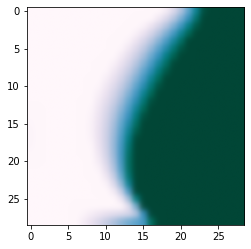

In [12]:
gen.generate('bucket1_first_iter')